# Start of PCA

In [9]:
import pandas as pd

one_hot_encoded_df2 = pd.read_csv('data/model/actMath_11.csv')


In [10]:
# dropping Id, binary label
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'proficient_diff', 'is_proficient'])


In [11]:
one_hot_encoded_df2.head()

,proficient_score,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,...,course_YearbkII9-12,course_Yearbook9-12,course_YrbkIII9-12,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy
0,0.529412,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
1,0.529412,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
2,0.941176,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
3,0.941176,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
4,0.941176,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0


In [12]:
one_hot_encoded_df2.columns.tolist()

['proficient_score',
 'course_ACT Review',
 'course_ACT/WK Rev.',
 'course_ACTReview.5C',
 'course_AG Communica',
 'course_AIDE-ELEM',
 'course_AIDE-LIB',
 'course_ALG I B ACCE',
 'course_ALIITRIGH/A',
 'course_ARMY LET I',
 'course_ARMY LET II',
 'course_ARMY LET III',
 'course_ARMY LET IV',
 'course_ARMYLETIVACT',
 'course_AcAdv.Baseba',
 'course_AcAdv.Basket',
 'course_AcAdv.CrossC',
 'course_AcAdv.Footb',
 'course_AcAdv.Softba',
 'course_AcAdv.Volley',
 'course_Accounting',
 'course_Adv BTA',
 'course_Advanced Agr',
 'course_Agriscience',
 'course_Alg Esntls B',
 'course_Alg II/Trig',
 'course_AlgEnrichmet',
 'course_AlgII/TrigAC',
 'course_Algebra I',
 'course_Algebra I A',
 'course_Algebra I B',
 'course_Algebra II',
 'course_AlgebraicCon',
 'course_Anat/Physio',
 'course_Anthropology',
 'course_Art App',
 'course_BAND MARCH',
 'course_BANDCONCERT',
 'course_BANDMARCHAUX',
 'course_BIOLOGY ADV',
 'course_Bak & Pstr A',
 'course_BandConcer.5',
 'course_BandConcer1C',
 'course_Band

## PCA

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(one_hot_encoded_df2.drop(columns=['proficient_score']))

In [14]:
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = 0
components = 0

for variance in explained_variance_ratio:
    cumulative_sum += variance
    components += 1
    if cumulative_sum >= 0.80:  # Adjust to your threshold (80%)
        break

print(f"Number of components needed: {components}")
print(f"Cumulative explained variance: {cumulative_sum}")

Number of components needed: 108
Cumulative explained variance: 0.803183671153641


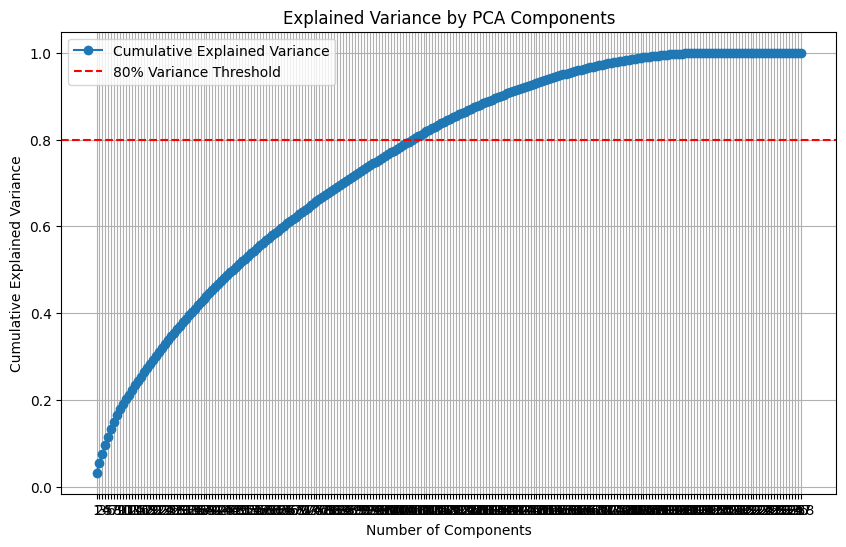

Number of components needed: 108


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Variance Threshold')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid()
plt.show()

# Calculate the number of components needed to explain at least 85% variance
components = np.argmax(cumulative_variance >= 0.80) + 1  # Add 1 to get the count of components
print(f"Number of components needed: {components}")


In [16]:
X_pca = pca.transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [17]:
first_108_pcs_df = X_pca_df.iloc[:, :108].copy()

In [18]:
first_108_pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108
0,0.109363,1.666291,24.116528,4.571970,-5.900160,-1.328985,3.571897,0.982600,-1.176280,8.538450,...,0.095875,0.234790,0.107747,-0.547898,-0.457518,0.123364,-0.397759,1.047355,-0.068832,-0.642952
1,0.109363,1.666291,24.116528,4.571970,-5.900160,-1.328985,3.571897,0.982600,-1.176280,8.538450,...,0.095875,0.234790,0.107747,-0.547898,-0.457518,0.123364,-0.397759,1.047355,-0.068832,-0.642952
2,0.237789,-0.619170,0.685160,-0.537647,0.894404,-0.407112,-0.942204,-1.987672,-1.192209,-0.088276,...,-0.027615,0.005860,0.002046,0.007339,0.025733,-0.032548,0.022456,0.003584,-0.014663,0.038977
3,0.237789,-0.619170,0.685160,-0.537647,0.894404,-0.407112,-0.942204,-1.987672,-1.192209,-0.088276,...,-0.027615,0.005860,0.002046,0.007339,0.025733,-0.032548,0.022456,0.003584,-0.014663,0.038977
4,0.237789,-0.619170,0.685160,-0.537647,0.894404,-0.407112,-0.942204,-1.987672,-1.192209,-0.088276,...,-0.027615,0.005860,0.002046,0.007339,0.025733,-0.032548,0.022456,0.003584,-0.014663,0.038977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,0.276821,-0.777051,0.890722,-0.707012,1.229907,-0.562255,-1.334325,-3.006055,-1.929716,-0.163924,...,-0.000258,0.000164,0.000063,0.000306,0.001119,-0.001966,0.001897,0.000336,-0.001493,0.004474
3833,0.320022,-0.956936,1.127879,-0.903179,1.624229,-0.744846,-1.799404,-4.236944,-2.836958,-0.259868,...,0.058506,-0.012196,-0.004247,-0.015075,-0.052767,0.065660,-0.044255,-0.007001,0.028413,-0.074569
3834,0.320022,-0.956936,1.127879,-0.903179,1.624229,-0.744846,-1.799404,-4.236944,-2.836958,-0.259868,...,0.058506,-0.012196,-0.004247,-0.015075,-0.052767,0.065660,-0.044255,-0.007001,0.028413,-0.074569
3835,0.320022,-0.956936,1.127879,-0.903179,1.624229,-0.744846,-1.799404,-4.236944,-2.836958,-0.259868,...,0.058506,-0.012196,-0.004247,-0.015075,-0.052767,0.065660,-0.044255,-0.007001,0.028413,-0.074569


In [19]:
import numpy as np

# Get the PCA components (loadings)
components = pca.components_[:108]  # First 108 principal components

# Create a DataFrame for feature loadings
feature_loadings_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])],
                                    index = one_hot_encoded_df2.drop(columns=['proficient_score']).columns)

# Find the most important features for each principal component
top_features = {}

for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Select the top 5 features (you can adjust this number)
    top_features[pc] = sorted_features.head(5).index.tolist()

# Display the top features for each principal component
for pc, features in top_features.items():
    print(f'Top features for {pc}: {features}')

Top features for PC1: ['course_HEALTH 9-12', 'course_DRIVERS ED', 'course_D&TSafetyEd', 'school_High School B', 'course_Health 9-12']
Top features for PC2: ['course_Physical Sci', 'course_English Gr10', 'course_Algebra I B', 'course_Eng Gr10 Adv', 'course_ChemistryAdv']
Top features for PC3: ['course_Ess II:USHis', 'course_Ess: Phy Sci', 'course_Eng Ess 10', 'course_Alg Esntls B', 'course_RdIntrv7-12']
Top features for PC4: ['school_High School B', 'course_BullBogAdv', 'course_Panther Adv', 'school_High School A', 'course_HISTUS1877AC']
Top features for PC5: ['course_EnglGr10ACCE', 'course_PhySciACCESS', 'course_HealthACCESS', 'course_TranSer 11', 'course_Ess: E & SS']
Top features for PC6: ['course_Ess: E & SS', 'course_TranSer 11', 'course_Eng Ess 11', 'course_EssIII:USHis', 'course_Geo Ess']
Top features for PC7: ['course_EnglGr10ACCE', 'course_PhySciACCESS', 'course_HealthACCESS', 'course_USHisIG10ACC', 'course_AlgII/TrigAC']
Top features for PC8: ['school_High School D', 'course_E

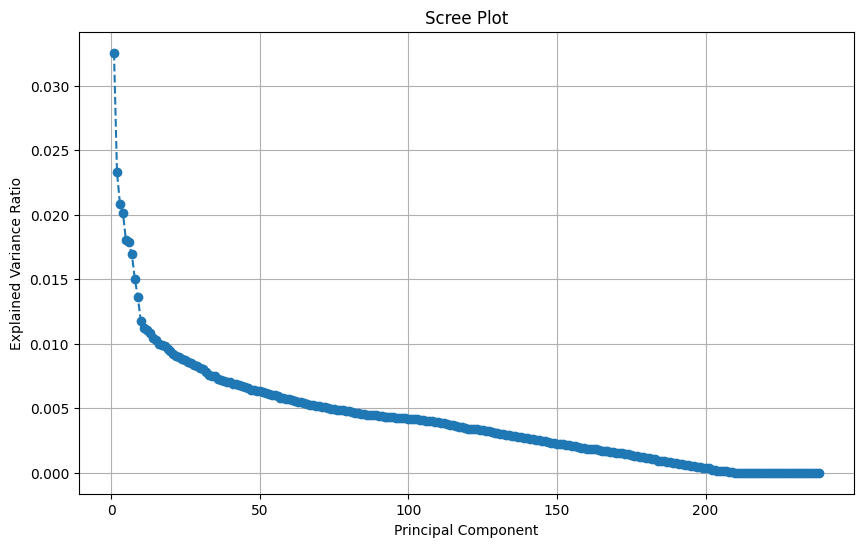

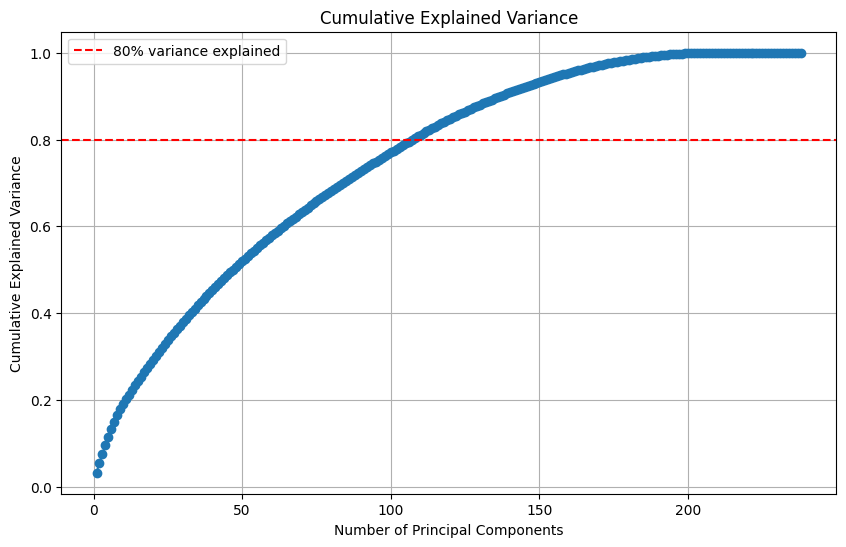

In [20]:
# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance explained')  # Adjust threshold as needed
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
first_108_pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108
0,0.109363,1.666291,24.116528,4.571970,-5.900160,-1.328985,3.571897,0.982600,-1.176280,8.538450,...,0.095875,0.234790,0.107747,-0.547898,-0.457518,0.123364,-0.397759,1.047355,-0.068832,-0.642952
1,0.109363,1.666291,24.116528,4.571970,-5.900160,-1.328985,3.571897,0.982600,-1.176280,8.538450,...,0.095875,0.234790,0.107747,-0.547898,-0.457518,0.123364,-0.397759,1.047355,-0.068832,-0.642952
2,0.237789,-0.619170,0.685160,-0.537647,0.894404,-0.407112,-0.942204,-1.987672,-1.192209,-0.088276,...,-0.027615,0.005860,0.002046,0.007339,0.025733,-0.032548,0.022456,0.003584,-0.014663,0.038977
3,0.237789,-0.619170,0.685160,-0.537647,0.894404,-0.407112,-0.942204,-1.987672,-1.192209,-0.088276,...,-0.027615,0.005860,0.002046,0.007339,0.025733,-0.032548,0.022456,0.003584,-0.014663,0.038977
4,0.237789,-0.619170,0.685160,-0.537647,0.894404,-0.407112,-0.942204,-1.987672,-1.192209,-0.088276,...,-0.027615,0.005860,0.002046,0.007339,0.025733,-0.032548,0.022456,0.003584,-0.014663,0.038977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3832,0.276821,-0.777051,0.890722,-0.707012,1.229907,-0.562255,-1.334325,-3.006055,-1.929716,-0.163924,...,-0.000258,0.000164,0.000063,0.000306,0.001119,-0.001966,0.001897,0.000336,-0.001493,0.004474
3833,0.320022,-0.956936,1.127879,-0.903179,1.624229,-0.744846,-1.799404,-4.236944,-2.836958,-0.259868,...,0.058506,-0.012196,-0.004247,-0.015075,-0.052767,0.065660,-0.044255,-0.007001,0.028413,-0.074569
3834,0.320022,-0.956936,1.127879,-0.903179,1.624229,-0.744846,-1.799404,-4.236944,-2.836958,-0.259868,...,0.058506,-0.012196,-0.004247,-0.015075,-0.052767,0.065660,-0.044255,-0.007001,0.028413,-0.074569
3835,0.320022,-0.956936,1.127879,-0.903179,1.624229,-0.744846,-1.799404,-4.236944,-2.836958,-0.259868,...,0.058506,-0.012196,-0.004247,-0.015075,-0.052767,0.065660,-0.044255,-0.007001,0.028413,-0.074569


In [23]:
#!pip install catboost


# Start of Catboost

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
import catboost

In [26]:
X = first_108_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels


In [27]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2058636	test: 0.1903646	best: 0.1903646 (0)	total: 180ms	remaining: 1m 30s
50:	learn: 0.1404788	test: 0.1409107	best: 0.1409107 (50)	total: 1.74s	remaining: 15.3s
100:	learn: 0.1285473	test: 0.1316611	best: 0.1316611 (100)	total: 3.31s	remaining: 13.1s
150:	learn: 0.1223806	test: 0.1261502	best: 0.1261502 (150)	total: 4.92s	remaining: 11.4s
200:	learn: 0.1197780	test: 0.1240033	best: 0.1240033 (200)	total: 6.5s	remaining: 9.67s
250:	learn: 0.1183761	test: 0.1225963	best: 0.1225963 (250)	total: 8.03s	remaining: 7.96s
300:	learn: 0.1177122	test: 0.1220323	best: 0.1220323 (300)	total: 9.54s	remaining: 6.3s
350:	learn: 0.1172982	test: 0.1215866	best: 0.1215866 (350)	total: 11.1s	remaining: 4.7s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.121502858
bestIteration = 358

Shrink model to first 359 iterations.
Mean Squared Error (MSE): 0.01
R-squared (R²): 0.62
Root Mean Squared Error (RMSE): 0.12


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


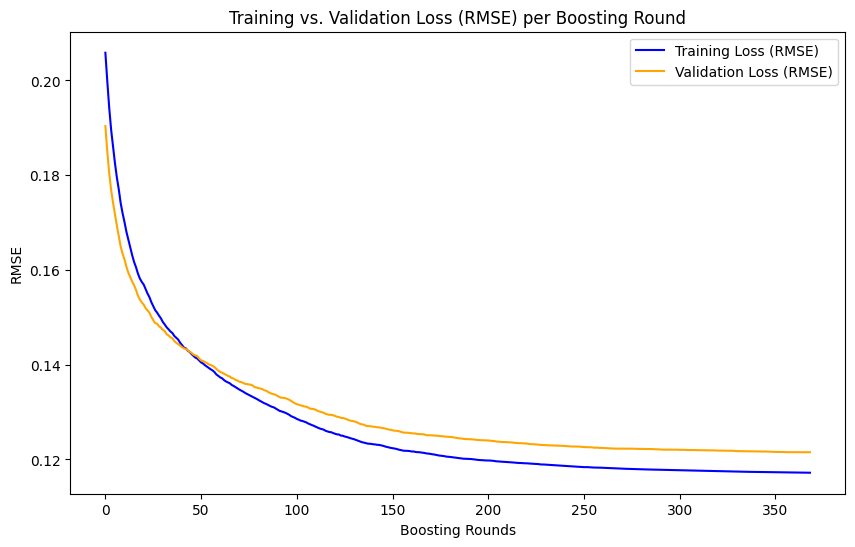

In [28]:
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Identify Categorical Features
categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]

# Step 4: Prepare the CatBoost data pools
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validation_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

# Train the CatBoost Model with logging of evaluation metrics
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=50,
    random_seed=42,
    cat_features=categorical_features_indices,
    eval_metric='RMSE'  # Set appropriate evaluation metric for regression
)

# Fit the model with early stopping
model.fit(
    train_pool,
    eval_set=validation_pool,
    use_best_model=True,
    plot=True,
    early_stopping_rounds=10  # Enable early stopping
)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False gives RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Extract training and validation loss from the evals result
eval_history = model.get_evals_result()
train_loss = eval_history['learn']['RMSE']
validation_loss = eval_history['validation']['RMSE']

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()


# final XGBoost model

Cross-Validated MSE: 0.02
[0]	train-rmse:0.20121	eval-rmse:0.18618
[1]	train-rmse:0.19114	eval-rmse:0.17743
[2]	train-rmse:0.18274	eval-rmse:0.17039
[3]	train-rmse:0.17554	eval-rmse:0.16441
[4]	train-rmse:0.16895	eval-rmse:0.15937
[5]	train-rmse:0.16349	eval-rmse:0.15473
[6]	train-rmse:0.15834	eval-rmse:0.15061
[7]	train-rmse:0.15429	eval-rmse:0.14729
[8]	train-rmse:0.15084	eval-rmse:0.14439
[9]	train-rmse:0.14742	eval-rmse:0.14166
[10]	train-rmse:0.14501	eval-rmse:0.13988
[11]	train-rmse:0.14265	eval-rmse:0.13842
[12]	train-rmse:0.14050	eval-rmse:0.13673
[13]	train-rmse:0.13853	eval-rmse:0.13528
[14]	train-rmse:0.13683	eval-rmse:0.13408
[15]	train-rmse:0.13539	eval-rmse:0.13318
[16]	train-rmse:0.13432	eval-rmse:0.13265
[17]	train-rmse:0.13312	eval-rmse:0.13168
[18]	train-rmse:0.13182	eval-rmse:0.13083
[19]	train-rmse:0.13095	eval-rmse:0.13034
[20]	train-rmse:0.12973	eval-rmse:0.12946
[21]	train-rmse:0.12890	eval-rmse:0.12913
[22]	train-rmse:0.12816	eval-rmse:0.12872
[23]	train-rmse:0.

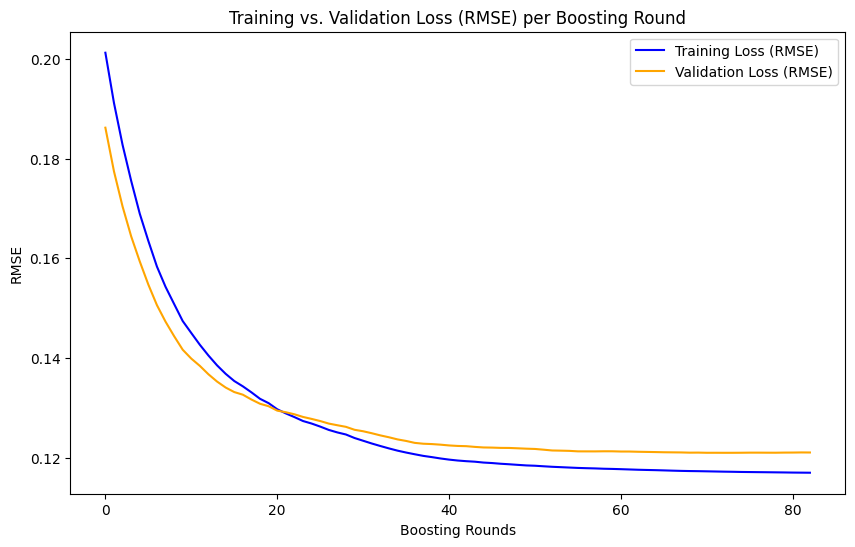

XGBoost - MSE: 0.01, R²: 0.62, RMSE: 0.12


In [29]:
from xgboost import XGBRegressor, DMatrix, train
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the XGBRegressor with additional regularization and reduced complexity
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,       # Reduced depth to limit complexity
    reg_alpha=0.1,     # L1 regularization
    reg_lambda=0.1,    # L2 regularization
    random_state=42
)

# Run cross-validation to get an estimate of the model's performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE: {mean_cv_mse:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for the XGBoost model
params = {
    'max_depth': 6, #this affects the r2 th emost
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Update evals list to include both training and validation sets
evals = [(dtrain, 'train'), (dtest, 'eval')]

# Train the XGBoost model with early stopping, tracking both training and validation losses
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract train and eval loss from evals_result
train_loss = evals_result['train']['rmse']
validation_loss = evals_result['eval']['rmse']

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()

# Make predictions on the test set
xgb_y_pred = xgb_model_trained.predict(dtest)

# Evaluate the model's performance on the test set
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")


# outlier model

In [23]:
# Step 1: Apply Isolation Forest and LOF for outlier detection on X_train and X_test
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Isolation Forest for outlier detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest_train = iso_forest.fit_predict(X_train)
iso_forest_test = iso_forest.predict(X_test)

# LOF for outlier detection
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.15) #20 --> 50

# Using fit_predict for LOF to detect outliers
lof_train = lof.fit_predict(X_train)
lof_test = lof.fit_predict(X_test)

# Step 2: Save new versions of X_train and X_test with outlier columns
X_train_new = X_train.copy()
X_test_new = X_test.copy()

# Add Isolation Forest and LOF outlier flags (1: inlier, -1: outlier)
X_train_new['outlier_iso_forest'] = (iso_forest_train == -1).astype(int)
X_test_new['outlier_iso_forest'] = (iso_forest_test == -1).astype(int)

X_train_new['outlier_lof'] = (lof_train == -1).astype(int)
X_test_new['outlier_lof'] = (lof_test == -1).astype(int)

# Step 3: Apply KMeans and DBSCAN for clustering and outlier detection
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train_new.drop(['outlier_iso_forest', 'outlier_lof'], axis=1))  # Drop outlier columns before scaling
X_scaled_test = scaler.transform(X_test_new.drop(['outlier_iso_forest', 'outlier_lof'], axis=1))

# DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=8)
X_train_new['cluster_dbscan'] = dbscan.fit_predict(X_scaled_train)

# KMeans clustering
kmeans = KMeans(n_clusters=50, random_state=42)
X_train_new['cluster_kmeans'] = kmeans.fit_predict(X_scaled_train)

# Step 4: Identifying outliers from DBSCAN and KMeans
# Outliers for DBSCAN are marked as -1
X_train_new['outlier_dbscan'] = (X_train_new['cluster_dbscan'] == -1).astype(int)

# For KMeans, outliers can be defined as data points in small clusters (adjustable threshold)
cluster_sizes_kmeans = X_train_new['cluster_kmeans'].value_counts()
small_clusters_kmeans = cluster_sizes_kmeans[cluster_sizes_kmeans <= 5].index  # Adjust size threshold
X_train_new['outlier_kmeans'] = X_train_new['cluster_kmeans'].isin(small_clusters_kmeans).astype(int)

# Combining all outlier flags
X_train_new['combined_outlier'] = ((X_train_new['outlier_iso_forest'] + X_train_new['outlier_lof'] + X_train_new['outlier_dbscan'] + X_train_new['outlier_kmeans']) > 0).astype(int)

# Step 5: Clustering on X_test
X_test_new['cluster_dbscan'] = dbscan.fit_predict(X_scaled_test)
X_test_new['cluster_kmeans'] = kmeans.predict(X_scaled_test)

# Identifying outliers for X_test
X_test_new['outlier_dbscan'] = (X_test_new['cluster_dbscan'] == -1).astype(int)
X_test_new['outlier_kmeans'] = X_test_new['cluster_kmeans'].isin(small_clusters_kmeans).astype(int)

# Combining outliers for X_test
X_test_new['outlier_iso_forest'] = (iso_forest_test == -1).astype(int)
X_test_new['outlier_lof'] = (lof_test == -1).astype(int)

X_test_new['combined_outlier'] = ((X_test_new['outlier_iso_forest'] + X_test_new['outlier_lof'] + X_test_new['outlier_dbscan'] + X_test_new['outlier_kmeans']) > 0).astype(int)

# Step 6: Train a model to predict based on outliers
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ensure both X_train_new and y_train have the same index
X_train_new = X_train_new.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)




# Evaluate the model
#evaluate_model(outlier_model, X_test_new.drop(['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1), y_test, label="Outlier Model")

# Train only on the detected outliers
X_outliers = X_train_new[X_train_new['combined_outlier'] == 1].drop(['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1)
y_outliers = y_train[X_train_new['combined_outlier'] == 1]

outlier_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

outlier_model.fit(X_outliers, y_outliers)

# Step 7: Evaluate the model
def evaluate_model(model, X, y, label="Model"):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    mad = np.mean(np.abs(predictions - np.median(y)))
    tail_rmse = np.sqrt(np.mean((predictions[y > np.quantile(y, 0.95)] - y[y > np.quantile(y, 0.95)])**2))
    
    print(f"{label} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, MAD: {mad:.2f}, Tail RMSE: {tail_rmse:.2f}")
    return predictions

# Evaluate the outlier model
evaluate_model(outlier_model, X_test_new.drop(['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1), y_test, label="Outlier Model")


Outlier Model - MSE: 0.01, RMSE: 0.12, R²: 0.61, MAD: 0.12, Tail RMSE: 0.33


array([1.2978625 , 0.9399403 , 0.9426129 , 0.8981627 , 1.2569919 ,
       0.8797049 , 0.9158096 , 1.1987802 , 1.0169057 , 0.940035  ,
       0.9573594 , 1.0721632 , 0.9573594 , 1.0013702 , 0.8625678 ,
       0.8377085 , 1.0199611 , 0.8651291 , 0.9573594 , 0.89692986,
       1.159311  , 0.8284546 , 0.9573594 , 0.91719633, 0.9416287 ,
       0.9573594 , 0.9380687 , 0.9573594 , 0.9573594 , 1.4254961 ,
       1.2468528 , 0.83153284, 0.83181757, 0.9573594 , 0.9573594 ,
       0.9380687 , 0.94504035, 0.9576374 , 1.3009923 , 1.0722275 ,
       0.9287142 , 1.1523625 , 0.89060056, 0.9573594 , 0.9573594 ,
       0.8651573 , 0.9573594 , 0.9722094 , 1.263127  , 1.1889423 ,
       0.9573594 , 1.078984  , 1.0778037 , 0.9034275 , 1.2106242 ,
       0.9776792 , 0.886864  , 0.9573594 , 1.4143592 , 0.8897661 ,
       0.9573594 , 0.9573594 , 0.890709  , 0.8953247 , 0.9037072 ,
       1.2468528 , 1.159311  , 0.92147654, 0.8519345 , 0.9731077 ,
       0.89985514, 0.9426129 , 0.9573594 , 0.9573594 , 0.95735

In [26]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Step 1: Predictions from Model 1 (Outlier Model)
# Train Model 1
outlier_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

X_outliers = X_train_new[X_train_new['combined_outlier'] == 1].drop(
    ['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1)
y_outliers = y_train[X_train_new['combined_outlier'] == 1]

outlier_model.fit(X_outliers, y_outliers)

# Predictions from Model 1
model1_train_preds = outlier_model.predict(X_train_new.drop(
    ['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1))
model1_test_preds = outlier_model.predict(X_test_new.drop(
    ['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1))

# Step 2: Predictions from Model 2 (Standard XGBoost Model)
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predictions from Model 2
model2_train_preds = xgb_model.predict(X_train)
model2_test_preds = xgb_model.predict(X_test)

# Step 3: Create Meta-Model Input
# Stack predictions as new features
stacked_train = np.column_stack((model1_train_preds, model2_train_preds))
stacked_test = np.column_stack((model1_test_preds, model2_test_preds))

# Step 4: Train the Stacking Meta-Model
meta_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

meta_model.fit(stacked_train, y_train)

# Step 5: Evaluate the Stacking Model
stacked_test_preds = meta_model.predict(stacked_test)

mse = mean_squared_error(y_test, stacked_test_preds)
r2 = r2_score(y_test, stacked_test_preds)
rmse = np.sqrt(mse)

print(f"Stacked Model - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

Stacked Model - MSE: 0.01, RMSE: 0.12, R²: 0.62


## feature importances

In [83]:
feature_importances_xgb = xgb_model_trained.get_score(importance_type='weight')

# Convert to DataFrame for easy handling
feature_importances_xgb  = pd.DataFrame(
    list(feature_importances_xgb.items()), columns=['Feature Id', 'Importance']
)

# Sort features by importance in descending order
feature_importances_xgb = feature_importances_xgb.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
feature_importances_xgb

Feature Importances:


,Feature Id,Importance
1,PC2,216.0
0,PC1,168.0
2,PC3,87.0
3,PC4,82.0
4,PC5,63.0
...,...,...
67,PC68,15.0
97,PC98,13.0
79,PC80,12.0
89,PC90,11.0


In [84]:
feature_importances_xgb[feature_importances_xgb['Importance'] > 60]

,Feature Id,Importance
1,PC2,216.0
0,PC1,168.0
2,PC3,87.0
3,PC4,82.0
4,PC5,63.0


In [87]:
# Merge important_features and feature_importances_df on 'Feature Id'
merged_features_df3 = feature_importances_xgb.merge(top_features_with_loadings_df, on='Feature Id', how='inner')

# Display the merged DataFrame
print("Merged DataFrame:")
merged_features_df3[:5]


Merged DataFrame:


,Feature Id,Importance,Feature 1,Loading Value 1,Feature 2,Loading Value 2,Feature 3,Loading Value 3,Feature 4,Loading Value 4,Feature 5,Loading Value 5
0,PC2,216.0,course_Physical Sci,0.312183,course_English Gr10,0.301171,course_Algebra I B,0.285069,course_Eng Gr10 Adv,0.279816,course_ChemistryAdv,0.277520
1,PC1,168.0,course_HEALTH 9-12,0.267672,course_DRIVERS ED,0.266102,course_D&TSafetyEd,0.239470,school_High School B,0.238286,course_Health 9-12,0.237900
2,PC3,87.0,course_Ess II:USHis,0.382932,course_Ess: Phy Sci,0.366436,course_Eng Ess 10,0.360581,course_Alg Esntls B,0.354434,course_RdIntrv7-12,0.269269
3,PC4,82.0,school_High School B,0.280564,course_BullBogAdv,0.257950,course_Panther Adv,0.256315,school_High School A,0.256315,course_HISTUS1877AC,0.192760
4,PC5,63.0,course_EnglGr10ACCE,0.298660,course_PhySciACCESS,0.298660,course_HealthACCESS,0.262087,course_TranSer 11,0.257569,course_Ess: E & SS,0.257569


In [88]:
# Merge important_features and feature_importances_df on 'Feature Id'
merged_features_df4 = feature_importances_xgb.merge(top_features_df, on='Feature Id', how='inner')

# Display the merged DataFrame
print("Merged DataFrame:")
merged_features_df4[:5]


Merged DataFrame:


,Feature Id,Importance,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
0,PC2,216.0,course_Physical Sci,course_English Gr10,course_Algebra I B,course_Eng Gr10 Adv,course_ChemistryAdv
1,PC1,168.0,course_HEALTH 9-12,course_DRIVERS ED,course_D&TSafetyEd,school_High School B,course_Health 9-12
2,PC3,87.0,course_Ess II:USHis,course_Ess: Phy Sci,course_Eng Ess 10,course_Alg Esntls B,course_RdIntrv7-12
3,PC4,82.0,school_High School B,course_BullBogAdv,course_Panther Adv,school_High School A,course_HISTUS1877AC
4,PC5,63.0,course_EnglGr10ACCE,course_PhySciACCESS,course_HealthACCESS,course_TranSer 11,course_Ess: E & SS


## gradient boosting

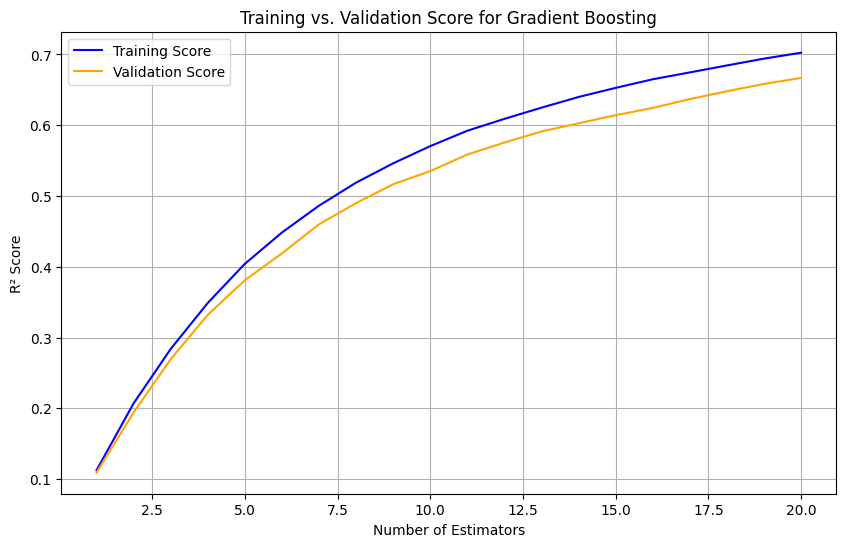

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Example: Ensure your X_train and y_train are defined
# X_train = ... (your features)
# y_train = ... (your target variable)

# Step 1: Initialize lists for scores
train_scores = []
test_scores = []

# Step 2: Iterate through a reduced number of estimators
for i in range(1, 21):  # Reduced to 20 for faster computation
    gb_model = GradientBoostingRegressor(n_estimators=i, learning_rate=0.1, random_state=42)
    
    # Use cross-validation for training score
    train_cv_score = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='r2').mean()
    train_scores.append(train_cv_score)

    # Fit the model on the full training data
    gb_model.fit(X_train, y_train)
    
    # Calculate validation score
    test_scores.append(gb_model.score(X_test, y_test))

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_scores, label='Training Score', color='blue')
plt.plot(range(1, 21), test_scores, label='Validation Score', color='orange')
plt.xlabel('Number of Estimators')
plt.ylabel('R² Score')
plt.title('Training vs. Validation Score for Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()


# old models (not tuned/ doesn't work)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

# Train K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
knn_y_pred = knn_model.predict(X_test)

# Evaluate
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
knn_rmse = np.sqrt(knn_mse)

print(f"K-Nearest Neighbors - MSE: {knn_mse:.2f}, R²: {knn_r2:.2f}, RMSE: {knn_rmse:.2f}")


K-Nearest Neighbors - MSE: 0.02, R²: 0.45, RMSE: 0.15


In [33]:
from sklearn.svm import SVR

# Train Support Vector Regressor
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predictions
svr_y_pred = svr_model.predict(X_test)

# Evaluate
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
svr_rmse = np.sqrt(svr_mse)

print(f"Support Vector Regressor - MSE: {svr_mse:.2f}, R²: {svr_r2:.2f}, RMSE: {svr_rmse:.2f}")


Support Vector Regressor - MSE: 0.02, R²: 0.55, RMSE: 0.13
